In [ ]:
from dataclasses import dataclass

import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import TargetEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error as MSE
from sklearn.model_selection import train_test_split

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
import seaborn as sns

# from bigmart_dataset import BigmartDataset

import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [ ]:
# connect to the google drive disk
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# display dataset
data_path = '/content/drive/MyDrive/neoversity/deep-learning/'

df=pd.read_csv(f'{data_path}concrete_strength_data.csv')
df.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.shape

(1030, 9)

In [ ]:
# get the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1030 non-null   float64
 1   BlastFurnaceSlag           1030 non-null   float64
 2   FlyAshComponent            1030 non-null   float64
 3   WaterComponent             1030 non-null   float64
 4   SuperplasticizerComponent  1030 non-null   float64
 5   CoarseAggregateComponent   1030 non-null   float64
 6   FineAggregateComponent     1030 non-null   float64
 7   AgeInDays                  1030 non-null   int64  
 8   Strength                   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
# describe the basic statistics
df.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
# build correlation matrix
df.corr().style.background_gradient()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
CementComponent,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
BlastFurnaceSlag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
FlyAshComponent,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
WaterComponent,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
SuperplasticizerComponent,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CoarseAggregateComponent,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FineAggregateComponent,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
AgeInDays,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [ ]:
# we see that there is no big correlation between features thats why we can't delete any of them

In [ ]:
# split on train and test sets
X=df.drop('Strength',axis=1)
y=df['Strength']

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2,
        random_state=42)
X_train

array([[ 158.6,  148.9,  116. , ...,  953.3,  719.7,   28. ],
       [ 424. ,   22. ,  132. , ...,  822. ,  750. ,   28. ],
       [ 275.1,    0. ,  121.4, ..., 1053.6,  777.5,    3. ],
       ...,
       [ 190.3,    0. ,  125.2, ..., 1079. ,  798.9,  100. ],
       [ 475. ,  118.8,    0. , ...,  852.1,  781.5,   28. ],
       [ 314. ,    0. ,  113. , ...,  925. ,  783. ,   28. ]])

In [ ]:
# perform data normalisation
scaler=StandardScaler().set_output(transform='pandas')
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train


,x0,x1,x2,x3,x4,x5,x6,x7
0,-1.160877,0.857387,0.982449,-0.314285,1.481654,-0.257462,-0.647520,-0.275673
1,1.308623,-0.602492,1.232598,-0.178192,0.391715,-1.926950,-0.273148,-0.275673
2,-0.076865,-0.855584,1.066874,-1.046371,0.626471,1.017859,0.066628,-0.689313
3,-0.291807,0.260321,0.357076,0.572666,0.307873,-1.761654,0.604093,-0.275673
4,-1.065038,-0.370108,1.112214,-1.102686,0.777385,1.363709,0.297676,-0.689313
...,...,...,...,...,...,...,...,...
819,0.027349,1.455604,-0.831134,-1.740915,0.844459,0.394821,0.390343,-0.689313
820,-0.340192,-0.855584,1.124721,-1.806615,0.978605,1.440000,0.355747,-0.507312
821,-0.865914,-0.855584,1.126285,-0.713178,0.626471,1.340822,0.331036,0.915611
822,1.783169,0.511112,-0.831134,-0.032713,0.458788,-1.544226,0.116050,-0.275673


In [ ]:
# define custom Dataset
class BigmartDataset(Dataset):
    def __init__(self, X, y, scale=True):
        # from Pandas Dataframe to numpy array
        self.X = X.values
        self.y=y

        if scale:
            sc=StandardScaler()
            self.X=sc.fit_transform(self.X)

    def __len__(self):
        # return size of a dataset
        return len(self.y)

    def __getitem__(self, idx):
        # supports indexing using dataset[i] to get the i-th row in a dataset
        X = torch.tensor(self.X[idx], dtype=torch.float32)
        y = torch.tensor(self.y[idx], dtype=torch.float32)
        return X,y

In [ ]:
# create train and test datasets
train_dataset = BigmartDataset(X_train, y_train, scale=False)
test_dataset = BigmartDataset(X_test, y_test, scale=False)

# load batches of data
train_dataloader = DataLoader(train_dataset, batch_size=100, num_workers=4)
test_dataloader = DataLoader(test_dataset, batch_size=100, num_workers=4)

In [ ]:
# create neural network class
class LinearModel(torch.nn.Module):
    def __init__(self, in_dim, out_dim=1):
        super().__init__()

        self.features = torch.nn.Sequential(
            nn.Linear(in_dim,128),
            torch.nn.ReLU(),

            nn.Linear(128,64),
            torch.nn.ReLU(),

            nn.Linear(64, out_dim),
        )

    def forward(self,x):
        output = self.features(x)
        return output

In [ ]:
# define a loss function
criterion = nn.MSELoss()

# we will use Mean Square Error for evaluation of obtained results, because it is used in regression tasks solving and apoints how close a regression line is to a set of data points.

In [ ]:
# define train and evaluate model function
def train_model(criterion, optimizer, num_epochs):
  train_losses = []
  train_mses = []
  test_losses = []
  test_mses = []

  for epoch in range(num_epochs):
    # train step
    model.train()

    y_pred_train = []

    for data in train_dataloader:
        # get and prepare inputs
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.reshape((targets.shape[0],1))

        # forward pass
        outputs = model(inputs)
        loss = criterion(outputs,targets)

        # backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        y_pred_train.extend(outputs.cpu().detach().numpy())

    # define mean square error
    mse=MSE(y_train, y_pred_train)
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, MSE: {mse:.2f}')
    train_mses.append(mse)
    train_losses.append(loss.cpu().detach().numpy())

    # eval step
    model.eval()

    y_pred_test = []

    with torch.no_grad():
        for data in test_dataloader:
            # Get and prepare inputs
            inputs, targets = data
            inputs, targets = inputs.float(), targets.float()
            targets = targets.reshape((targets.shape[0], 1))
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # No backward pass

            y_pred_test.extend(outputs.cpu().detach().numpy())

        test_mses.append(MSE(y_test, y_pred_test))
        test_losses.append(loss.cpu().detach().numpy())
  return train_losses, test_losses, train_mses, test_mses

In [ ]:
# define function for train and test losses visualisation
def plot_loss_graph(train_losses,test_losses):
  plt.figure(figsize=(4, 3))
  plt.plot(train_losses, label='Train')
  plt.plot(test_losses, label='Validation')
  plt.legend(loc='best')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Training vs Validation Loss')
  plt.show()


In [ ]:
# define function for train and test mean absolute error visualisation
def plot_mse_graph(train_mses,test_mses):
  plt.figure(figsize=(4, 3))
  plt.plot(train_mses, label='Train')
  plt.plot(test_mses, label='Validation')
  plt.legend(loc='best')
  plt.xlabel('Epochs')
  plt.ylabel('MSE')
  plt.title('Training vs Validation Metric - MSE')
  plt.show()


******************************************************

Let's try to train and validate our model with different optimizers, learning rates and number of epochs to define the optimal variant

******************************************************

Epoch [10/100], Loss: 1330.4113, MSE: 1026.66
Epoch [20/100], Loss: 247.2482, MSE: 193.12
Epoch [30/100], Loss: 214.2727, MSE: 169.96
Epoch [40/100], Loss: 195.6543, MSE: 155.96
Epoch [50/100], Loss: 182.1377, MSE: 145.89
Epoch [60/100], Loss: 171.5577, MSE: 138.03
Epoch [70/100], Loss: 162.9066, MSE: 131.63
Epoch [80/100], Loss: 155.5421, MSE: 126.16
Epoch [90/100], Loss: 148.8383, MSE: 121.30
Epoch [100/100], Loss: 142.4895, MSE: 116.77


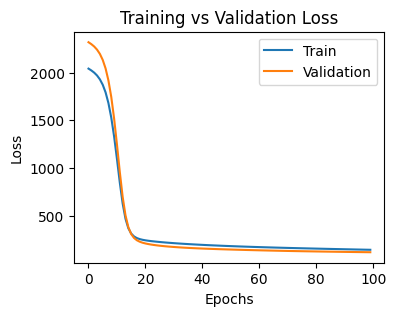

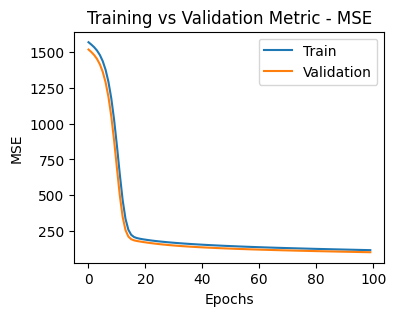

In [ ]:
# optimizer=SGD, learning_rate=0.0001, number_of_epochs=100

# initialize the model
model = LinearModel(in_dim=X_train.shape[1], out_dim=1)
# define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

# train model and visualize the results
train_losses, test_losses, train_mses, test_mses = train_model(criterion, optimizer, num_epochs=100)
plot_loss_graph(train_losses,test_losses)
plot_mse_graph(train_mses,test_mses)



We see that our loss and MSE functions decrease, but the value of mean squared error is big enouhg. Let's try decrease our learning rate

Epoch [10/100], Loss: 72.4262, MSE: 96.35
Epoch [20/100], Loss: 29.6433, MSE: 63.21
Epoch [30/100], Loss: 20.3740, MSE: 46.90
Epoch [40/100], Loss: 16.4717, MSE: 34.44
Epoch [50/100], Loss: 11.2476, MSE: 27.39
Epoch [60/100], Loss: 10.2186, MSE: 27.65
Epoch [70/100], Loss: 8.5744, MSE: 25.25
Epoch [80/100], Loss: 7.5550, MSE: 22.58
Epoch [90/100], Loss: 6.7995, MSE: 20.54
Epoch [100/100], Loss: 6.3639, MSE: 20.30


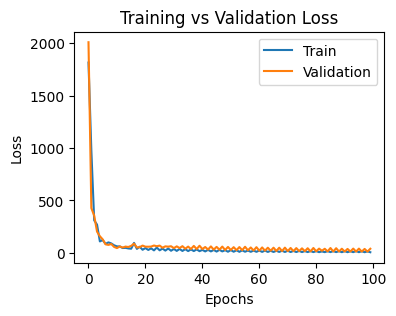

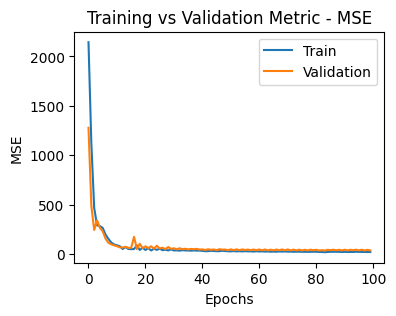

In [ ]:
# optimizer=SGD, learning_rate=0.01, number_of_epochs=100

# initialize the model
model = LinearModel(in_dim=X_train.shape[1], out_dim=1)
# define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# train model and visualize the results
train_losses, test_losses, train_mses, test_mses = train_model(criterion, optimizer, num_epochs=100)
plot_loss_graph(train_losses,test_losses)
plot_mse_graph(train_mses,test_mses)

We obtained quite good results, both our functions decrease and reach convergency. Let's try to use Adam optimizer with the same parameters.

Epoch [10/100], Loss: 149.5052, MSE: 126.11
Epoch [20/100], Loss: 59.2299, MSE: 53.90
Epoch [30/100], Loss: 33.2806, MSE: 34.45
Epoch [40/100], Loss: 22.9311, MSE: 27.61
Epoch [50/100], Loss: 17.7587, MSE: 24.12
Epoch [60/100], Loss: 12.9038, MSE: 21.43
Epoch [70/100], Loss: 9.2174, MSE: 19.19
Epoch [80/100], Loss: 6.6718, MSE: 17.01
Epoch [90/100], Loss: 5.8426, MSE: 15.77
Epoch [100/100], Loss: 5.3260, MSE: 15.34


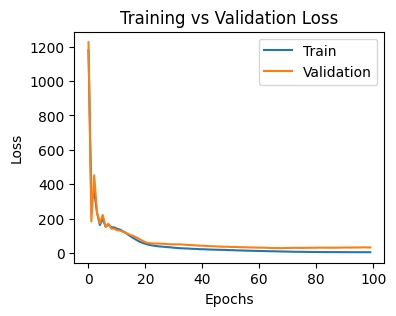

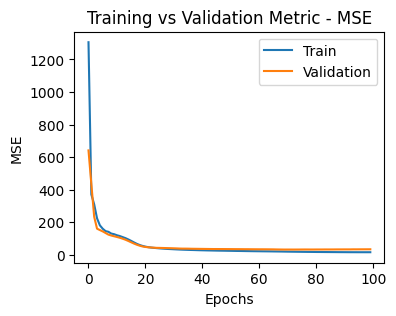

In [ ]:
# optimizer=Adam, learning_rate=0.01, number_of_epochs=100

# initialize the model
model = LinearModel(in_dim=X_train.shape[1], out_dim=1)
# define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# train model and visualize the results
train_losses, test_losses, train_mses, test_mses = train_model(criterion, optimizer, num_epochs=100)
plot_loss_graph(train_losses,test_losses)
plot_mse_graph(train_mses,test_mses)

Finally, we reached the best results of accuracy, MSE equals to 17% with the help of Adam optimizer and adjusting the learning rate equals to 0.01. So, we can conclude that we have built an efficient model for the given regression problem-solving.